# 1. Environment Setup

In [157]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

In [158]:
df = pd.read_csv('forest_fires_dataset.csv')
df.head()

,Duff_Moisture,Drought_Code,Initial_Spread_Index,temp,Relative_Humidity,wind,rain,area,month
0,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3
1,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10
2,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10
3,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3
4,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3


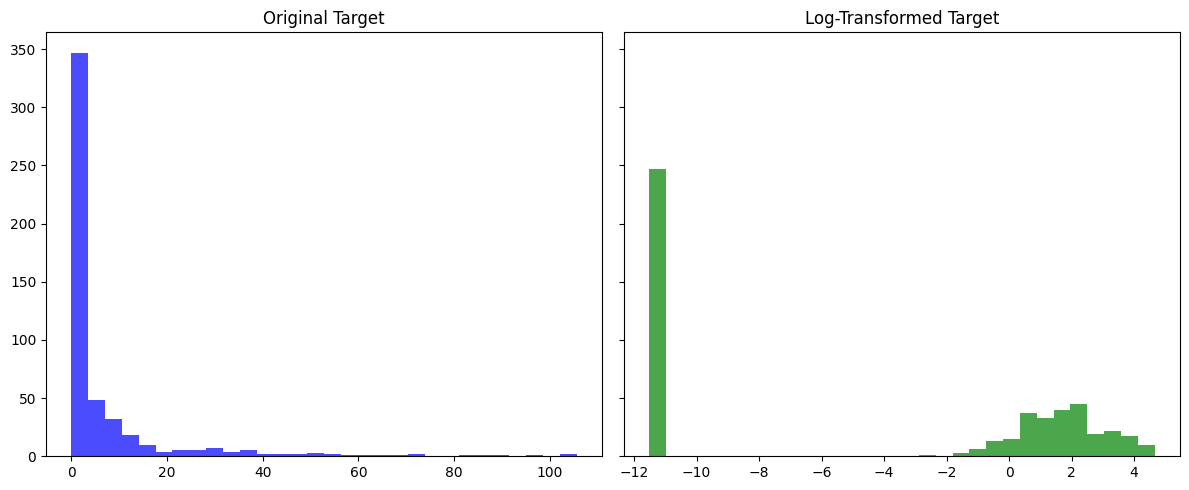

In [159]:
X = df.drop(columns=['area'])
y = df['area']

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axes[0].hist(y, bins=30, color='blue', alpha=0.7)
axes[0].set_title('Original Target')

# Log-transformed data histogram
axes[1].hist(np.log(y + 1e-5), bins=30, color='green', alpha=0.7)
axes[1].set_title('Log-Transformed Target')

# Adjust layout
plt.tight_layout()
plt.show()

## 1.2 Data Exploration

<Axes: >

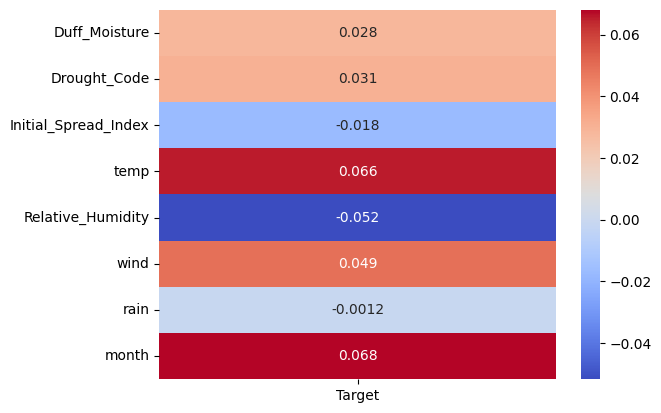

In [160]:
# Calculate the correlation between features and the target
correlations = X.corrwith(y)

# Create a heatmap
sns.heatmap(
    correlations.values.reshape(-1,1),
    annot=True,  # Show the correlation values
    cmap='coolwarm',  # Color scheme for the heatmap
    cbar=True,  # Display color bar
    yticklabels=X.columns,  # Feature names as y-tick labels
    xticklabels=['Target'],  # Label for the x-axis
)

In [161]:
X = df[['month', 'Drought_Code', 'temp', 'wind']]
y = np.log(df['area'] + 1e-5)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

## 1.3 Plotting Function

In [162]:
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.7)
    sns.lineplot(x=y_true, y=y_true, color='red')  # Perfect prediction line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.show()

# 2. Linear Regression

Linear Regression - MSE: 42.8118, R²: 0.0303


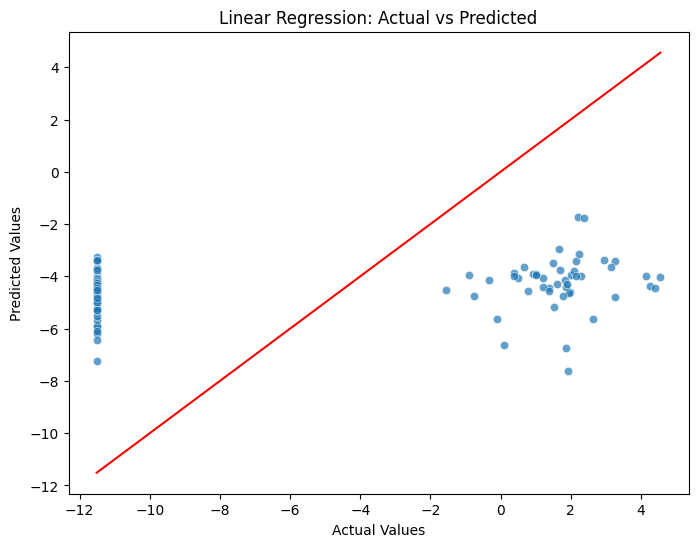

In [163]:
# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear:.4f}, R²: {r2_linear:.4f}")
plot_actual_vs_predicted(y_test, y_pred_linear, 'Linear Regression: Actual vs Predicted')


# 3. Ridge Regression

Ridge Regression - MSE: 42.8190, R²: 0.0301


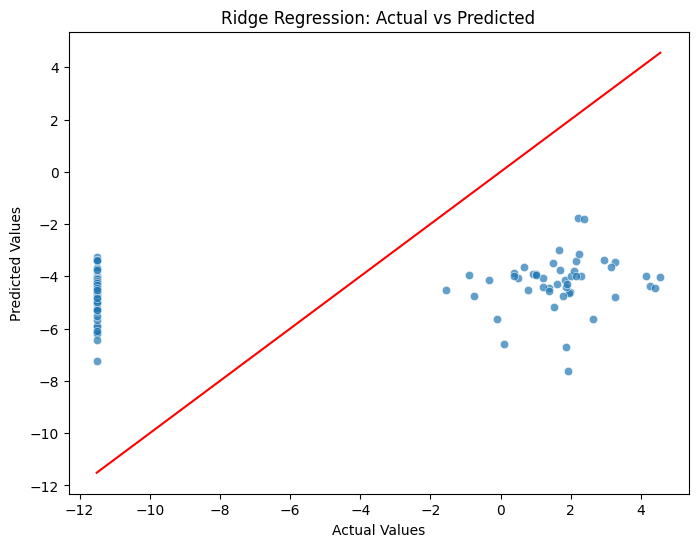

In [164]:
# Initialize and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MSE: {mse_ridge:.4f}, R²: {r2_ridge:.4f}")
plot_actual_vs_predicted(y_test, y_pred_ridge, 'Ridge Regression: Actual vs Predicted')


# 4. LASSO Regression

Lasso Regression - MSE: 43.1342, R²: 0.0230


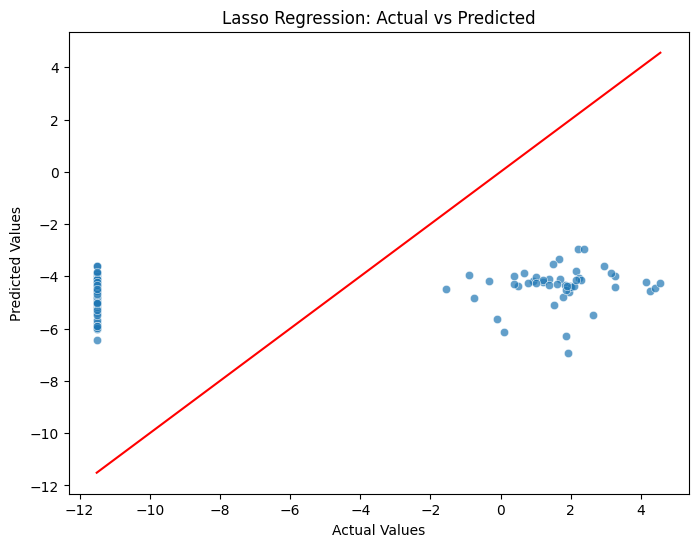

In [165]:
# Initialize and train the Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # You can tune the alpha parameter
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MSE: {mse_lasso:.4f}, R²: {r2_lasso:.4f}")
plot_actual_vs_predicted(y_test, y_pred_lasso, 'Lasso Regression: Actual vs Predicted')

# 5. Polynomial Regression

Polynomial Regression (Degree 2) - MSE: 41.5105, R²: 0.0598


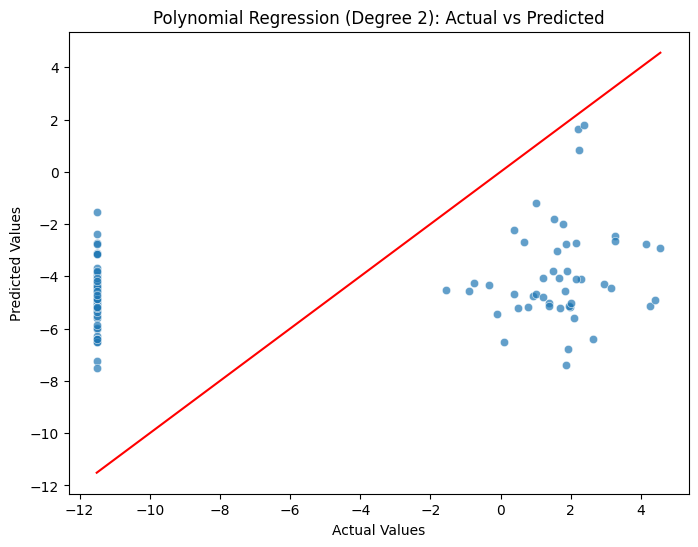

In [166]:
# Define the degree of the polynomial
degree = 2  # You can experiment with different degrees

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (Degree {degree}) - MSE: {mse_poly:.4f}, R²: {r2_poly:.4f}")
plot_actual_vs_predicted(y_test, y_pred_poly, f'Polynomial Regression (Degree {degree}): Actual vs Predicted')


# 6. Comparisons

In [167]:
# Create a summary DataFrame
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', f'Polynomial Regression (Degree {degree})'],
    'MSE': [mse_linear, mse_ridge, mse_lasso, mse_poly],
    'R²': [r2_linear, r2_ridge, r2_lasso, r2_poly]
})

display(results)

,Model,MSE,R²
0,Linear Regression,42.811830,0.030293
1,Ridge Regression,42.819001,0.030131
2,Lasso Regression,43.134190,0.022992
3,Polynomial Regression (Degree 2),41.510453,0.059770


# 7. Cross Validation

## 7.1 Random Sampling

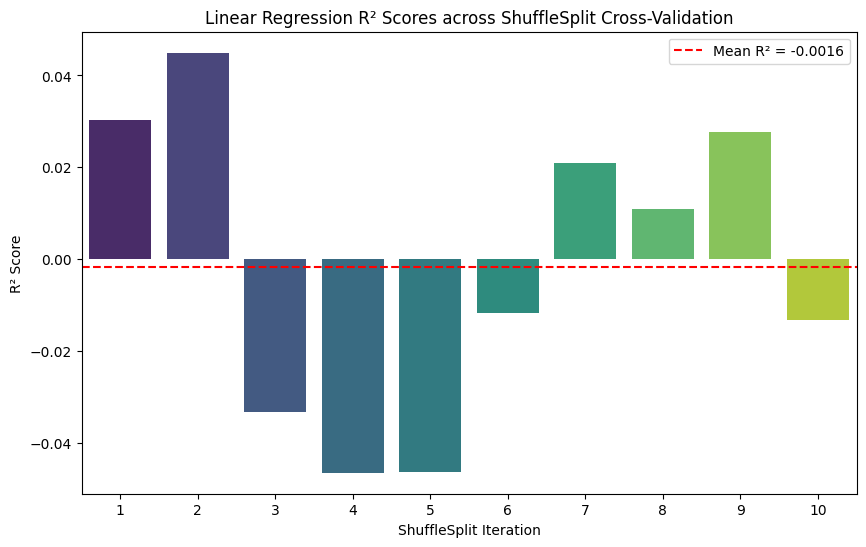

In [172]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression

# Define the model
linear_model = LinearRegression()

# Define the cross-validation strategy
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(linear_model, X_scaled, y, cv=shuffle_split, scoring='r2')

# Plot R² scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, len(cv_scores)+1)), y=cv_scores, palette='viridis')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean R² = {cv_scores.mean():.4f}')
plt.title('Linear Regression R² Scores across ShuffleSplit Cross-Validation')
plt.xlabel('ShuffleSplit Iteration')
plt.ylabel('R² Score')
plt.legend()
plt.show()

## 7.2 K-folds

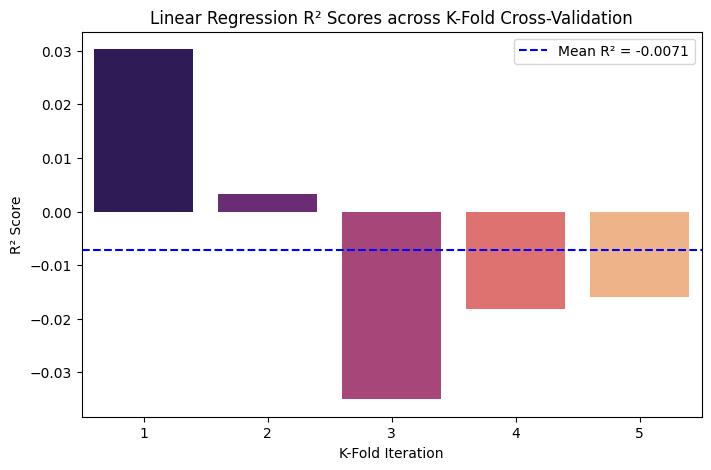

In [170]:
from sklearn.model_selection import KFold

linear_model_kfold = LinearRegression()

# Define the cross-validation strategy
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_kfold = cross_val_score(linear_model_kfold, X_scaled, y, cv=kfold, scoring='r2')

# Plot R² scores for K-Fold
plt.figure(figsize=(8, 5))
sns.barplot(x=list(range(1, len(cv_scores_kfold)+1)), y=cv_scores_kfold, palette='magma')
plt.axhline(y=cv_scores_kfold.mean(), color='blue', linestyle='--', label=f'Mean R² = {cv_scores_kfold.mean():.4f}')
plt.title('Linear Regression R² Scores across K-Fold Cross-Validation')
plt.xlabel('K-Fold Iteration')
plt.ylabel('R² Score')
plt.legend()
plt.show()